# Machine Learning Part 1 - Problems

**Author:** Ties de Kok ([Personal Website](https://www.tiesdekok.com))  <br>
**Last updated:** September 2022  
**Python version:** Python 3.6+     
**Recommended environment: `researchPython`**

In [1]:
import os
recommendedEnvironment = 'researchPython'
if os.environ['CONDA_DEFAULT_ENV'] != recommendedEnvironment:
    print('Warning: it does not appear you are using the {0} environment, did you run "conda activate {0}" before starting Jupyter?'.format(recommendedEnvironment))

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: left; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Introduction</span>
</div>

<div style='border-style: solid; padding: 5px; border-color: darkred; border-width:5px;  text-align: center; margin-left: 100px; margin-right:100px;'>
<span style='color:black; font-size: 20px; font-weight:bold;'> Make sure to open up the respective tutorial notebook(s)! <br> That is what you are expected to use as primariy reference material. </span>
</div>

### Relevant tutorial notebooks:

1) [`0_python_basics.ipynb`](https://nbviewer.jupyter.org/github/TiesdeKok/LearnPythonforResearch/blob/master/0_python_basics.ipynb)  


2) [`2_handling_data.ipynb`](https://nbviewer.jupyter.org/github/TiesdeKok/LearnPythonforResearch/blob/master/2_handling_data.ipynb)  


3) [`NLP_Notebook.ipynb`](https://nbviewer.jupyter.org/github/TiesdeKok/Python_NLP_Tutorial/blob/master/NLP_Notebook.ipynb)  

## Import required packages

In [2]:
import os, sys
from pathlib import Path
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: center; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Supervised Machine Learning - Basics</span>
</div>  

<div style='border-style: solid; padding: 5px; border-color: darkred; border-width:5px;  text-align: center; margin-left: 100px; margin-right:100px;'>
<span style='color:black; font-size: 15px; font-weight:bold;'> Note: feel free to add as many cells as you'd like to answer these problems, you don't have to fit it all in one cell. </span>
</div>

For part 1 you will work with a dataset of news article headlines. The original dataset is documented here: http://groups.di.unipi.it/~gulli/AG_corpus_of_news_articles.html.

A modified version of the dataset, which are you expected to use, is located here: `data --> news_df.xlsx`.  

The modified dataset contains cleaned up news article titles for two categories: *Business* and *Sport*. 

**Your end goal:** create a machine learning classifier that can identify *Business* headlines from *Sports* headlines. 

----
## 1a) Prepare the data

### 1a - i) Load the `news_df` file using Pandas  

The file is located here: `data --> news_df.xlsx`

### 1a - ii) Drop any rows with missing values in `news_df`

### 1a - iii) Show the number of headlines in the sample for each category  

Do we have to be worried about an imbalanced classification?

### 1a - iiii) Create a new column called `y` that contains a `1` if the category is Business and `0` otherwise 

----
## 1b) Represent the text numerically. 

We can't feed the text directly into a statistical model as statistical models expect numbers as input.   
The solution is to represent the text of every news headline using some type of numerical representation.   

For more in-depth details and exlanations, see the "advanced" recordings for the NLP session. 

### 1b - i) Use the `TFIDF` method to represent the `title` numerically

I recommend also removing stop words to reduce the number of keywords, which you can direclty through the `TfidfVectorizer` function (check the documentation!). 

**Documentation:** https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

### 1b - ii) What do we end up with?

Run `tfidf.shape` and explain (in writing) what the result means.

### 1b - iii) Explore the numerical conversion.

Expressing a piece of text numerically in itself is easy, however, doing it properly in a way that is meaningful is challenging. 

So it is good to apply some common sense with these types of conversation and look at some examples to see whether things make sense. 

Below I present you with some code that shows you for a given sentence what the numerical values are that represent that sentence. 

**Task:** Provide a short evaluation of things you observe based on the numerical values below. 

Examples of things to address:

1. Why do some words have higher number relative to others?   
2. Why are some words not shown here?

In [14]:
sentences = [
    'Seattle Sounders go on record-setting goal barrage vs San Jose Earthquakes, Fredy Montero is a goal machine!'
]

feature_names = transformer.get_feature_names_out()

for sen_item in transformer.transform(sentences).toarray():
    for i, value in enumerate(sen_item):
        if value > 0:
            print(f'''{feature_names[i]:>15}: {value:.4f}''')

        barrage: 0.3635
    earthquakes: 0.3283
           goal: 0.5011
           jose: 0.3100
        machine: 0.3217
         record: 0.1875
            san: 0.2521
        seattle: 0.2584
        setting: 0.3145
             vs: 0.2122


----
## 1c) Create a train / test split

### 1c i) Create a train - test  split using `train_test_split` with a test size of `0.33`.  

**Note:** to ensure an equal distribution of 1 and 0 between the train / test samples I recommend to use the `stratify` parameter to stratify on the Y column.

----
### 1c ii) How many observations do you have in your train and test samples?

## 1d) Run a basic logistic regression  

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### 1d - i) Train the logistic regression with the default parameters

**Tip:** you might have to add `max_iter=1000` to make sure the model converges (you'll get a warning otherwise). 

**Reminder:** you train the model based on the training data created in step 1c. 

----
### 1d - ii) Show the classification report  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html  

**Hint 1:** You will first have to predict y based on the X data in your *test* sample.  
**Hint 2:** You will want to compare the true y values for the *test* sample with the predicted y values for the test sample. 

You should see something like this:

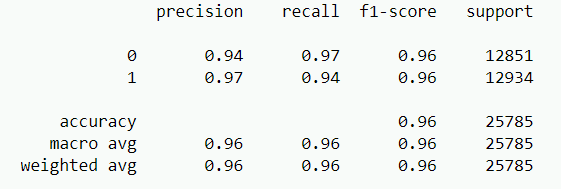

### 1d - iii) Validate your LogisticRegression using 5 fold cross validation.  

Use `cross_val_score` with 5 folds, your scoring metric should be `f1_macro`.

**Question:** does the `f1_macro` reported in `1d-ii` hold up with cross validation?

See: https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: center; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Supervised Machine Learning - Advanced</span>
</div>  

For all intents and purposes, we've "done machine learning" in the steps above, however, I convenienty skipped over a few parts of a typical ML pipeline that are a bit more advanced. 

Specifically:

- Hyperparameters  
- Formalizing your ML workflow into a "pipeline"
- Attempting to understand why the model makes the predictions that it does

You'll work on these elements in the problems below (using the same `news_df` dataset).

----
## 2a) Create a machine learning pipeline with the `TFIDF` vectorizer and the `SVC` model

**What is a pipeline?**

The objective of a pipeline is to formalize the steps of your machine learning workflow before running it, such that you can have it all run in a single go (instead of having to run them each step by step yourself).

This is beneficial for a few reasons:  

1. It makes it possible to do hyper parameter optimization for all parts of your pipeline at once.  
2. It gives you a single function that you can use to make predictions for out of sample documents.  
3. In certain scenarios, there might be performance benefits. 

In our case, we have two primary steps:

- Step 1: convert the text to a vector using `TFIDF`  
- Step 2: use the `TFIDF` vectors to predict Y using a model of our choice

**Task:** Create a scikit learn pipeline that performs these two steps.

*Note 1:* You can use `Pipeline` or `make_pipeline`, whatever you prefer.   

Useful references:

- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html#sklearn.pipeline.make_pipeline
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

**Important:** make sure to include `probability = True` in your `SVC` function as you will need it later!

---
## 2b) Create a new train-test split for a smaller subsample

Training the `SVC` model is substantially slower relative to a logistic regression. So to avoid you from having to wait around for training to finish while solving these problems, I suggest that you:

1. Draw a random sample of 20,000 headlines from the `news_df` dataset using Pandas    
2. Create a new set of train-test split subsamples based on the reduced sample.   

---
## 2c) Train the `SVC` model with the default hyperparameters

### 2c - i) Train the `SVC` model on your training data

*Pro-tip:* you can put `%%time` at the start of the cell if you want to keep track of how long a cell took to run.

### 2d ii) Show the classification report for the evaluation data

## 2c) Train the `SVC` model with hyper parameter optimization

You can optimize any parameter that feeds into a function that is part of your pipeline. 

Which in our case is `tfidf` and `svc`:  

- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

There are many ways of doing hyper-parameter optimization, but in essence it boils down to "try a bunch of different combinations and find the combinations that yields the best performance". This is simply enough in practice, but the number of combinations once you start adding parameters because extremely large real fast. 

For our purposes, let's say we want to try the following combinations:

- `tfidf`: removing stopwords vs. not removing stopwords   
- `svc`: *gamma* parameter --> 0.001 vs. 'scale'
- `svc`: *C* parameter --> 1.0
- `svc`: using the *rbf* kernel.

We'll obvioulsy need to express this in a way that Python / Scikit learn can understand:

```python
param_grid = {
    'tfidfvectorizer__stop_words': ['english', None],
    'svc__C': [1],
    'svc__gamma': [0.001, 'scale'],
    'svc__kernel' : ['rbf']
}
```

**Important note:** You need to make sure that these parameters in your grid are not already specific when you created your pipeline, otherwise it will give an error!

### 2c - i) Perform the hyper-parameter optimization using `GridSearchCV`
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

You can use the the `param_grid` that is show in the example above.

**Warning:** This might take some minutes to complete, that is normal. With a single thread (i.e. without `n_jobs=-1`) it will likely take between 3.5 to 5 minutes. You can try setting `n_jobs=-1` in the `GridSearchCV` function to speed the gridsearch up, this will use all the processing threads in your computer instead of only 1.

**Note:** For consistency sake, I recommend setting the scoring options in `GridSearchCV` to 'f1_macro'.

### 2c - ii) What are the best performing parameters?

### 2c - iii) How well did the best performing model perform on the test data?

---
## 2d) Apply our new pipeline to make predictions

You can directly us the model/pipeline that came out of your `GridSearchCV` here

### 2d - i) Create a prediction for the following out-of-sample sentences:   
```python
sentences = ['The market cap of Apple recently surpassed 2 trillion dollars.', 
             'Seattle Sounders go on record-setting goal barrage vs San Jose Earthquakes.']
```

### 2d - ii) Repeat 2d -i but instead of showing 0 / 1 show the probability that a sentence is 1

### 2d - iii) Use `lime` to explain what the model is doing   

For this we will use the `LIME` library, which is not included in the `environment.yml` file.   
I left it out on purpose so that you can get some experience with installing packages you might encounter online. 

You can read up on it here: https://github.com/marcotcr/lime

You can install `lime` by following these steps:

1. Open up your Anaconda prompt / terminal  
2. Activate the `researchPython` environment  
3. Run `pip install lime`  
4. Import lime into the notebook (see below):

```python
from lime.lime_text import LimeTextExplainer
```

**Your task:** recreate the illustration below for the two out-of-sample sentences from the previous step. Include a brief discussion regarding whether what you are seeing is increasing or decreasing your confidence in the models' predictions.

**Hint:** https://marcotcr.github.io/lime/tutorials/Lime%20-%20basic%20usage%2C%20two%20class%20case.html

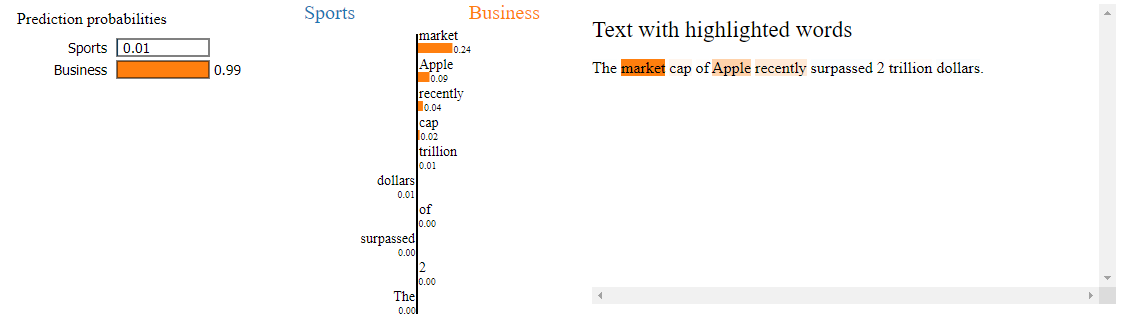

In [35]:
from lime.lime_text import LimeTextExplainer